In [70]:
# Import dependencies
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

#### Characteristic of Data

In [71]:
df = pd.read_csv("../../datasets/stroke-dataset.csv")

# Drop id column as it is irrelevant
df = df.drop(columns=['id'])

In [72]:
# Look at the first 5 records
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [73]:
# Look at the last 5 records
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [74]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [75]:
# Check for numerical data
df_num = df.select_dtypes(include=['float64','int64'])
df_num

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [76]:
# Check for categorical data
df_cat = df.select_dtypes(include=['object'])
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


#### Data Cleaning

In [77]:
stroke_df_cleaned = df.copy()

In [78]:
# Check feature datatypes
stroke_df_cleaned.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [79]:
# Check for missing values
missing_vals = stroke_df_cleaned.isnull().sum()
print(f"Missing values: \n{missing_vals}")

Missing values: 
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [80]:
# Check for duplicated values
duplicated_vals = stroke_df_cleaned.duplicated()
print(f"Duplicated values: \n{duplicated_vals}")

Duplicated values: 
0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool


In [81]:
# Normalize age data type to int
stroke_df_cleaned['age'] = stroke_df_cleaned['age'].apply(lambda x: round(x) if isinstance(x, (int, float)) else x)
stroke_df_cleaned.dtypes

gender                object
age                    int64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [82]:
# Handle missing value by using median
stroke_df_cleaned['bmi'] = pd.to_numeric(stroke_df_cleaned['bmi'], errors='coerce')  # Convert non-numeric to NaN
stroke_df_cleaned['bmi'] = stroke_df_cleaned['bmi'].fillna(stroke_df_cleaned['bmi'].mean())  # Impute with mean

missing_vals = stroke_df_cleaned.isnull().sum()
print(f"Missing values: \n{missing_vals}")

Missing values: 
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


<Axes: >

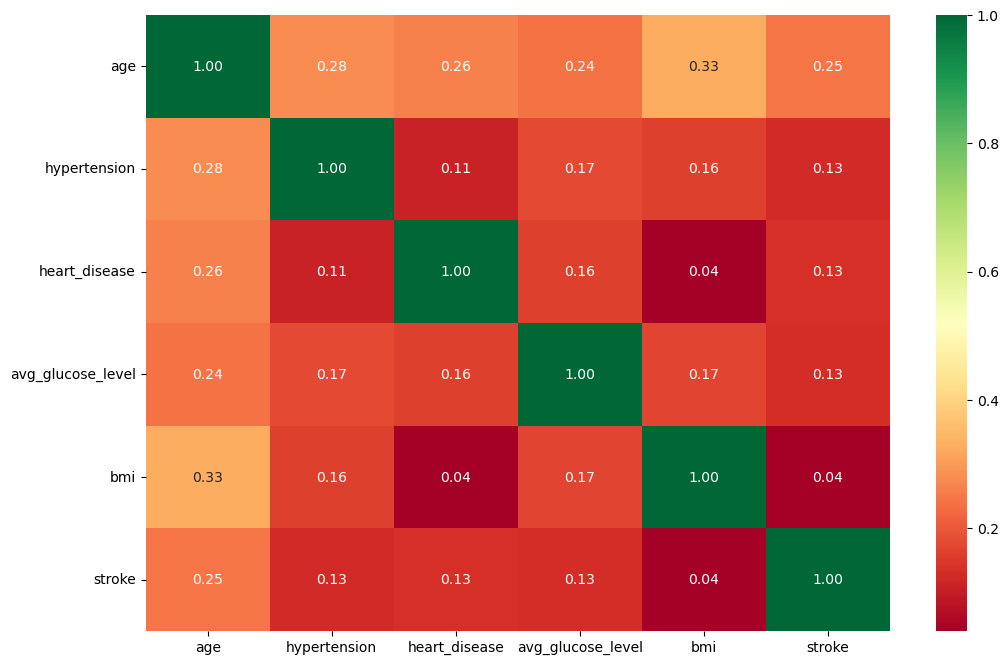

In [83]:
# Pearson correlation
pearson_corr = stroke_df_cleaned.corr(method='pearson', numeric_only=True)

plt.subplots(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='RdYlGn')

#### Data Visualization

##### Feature Distribution

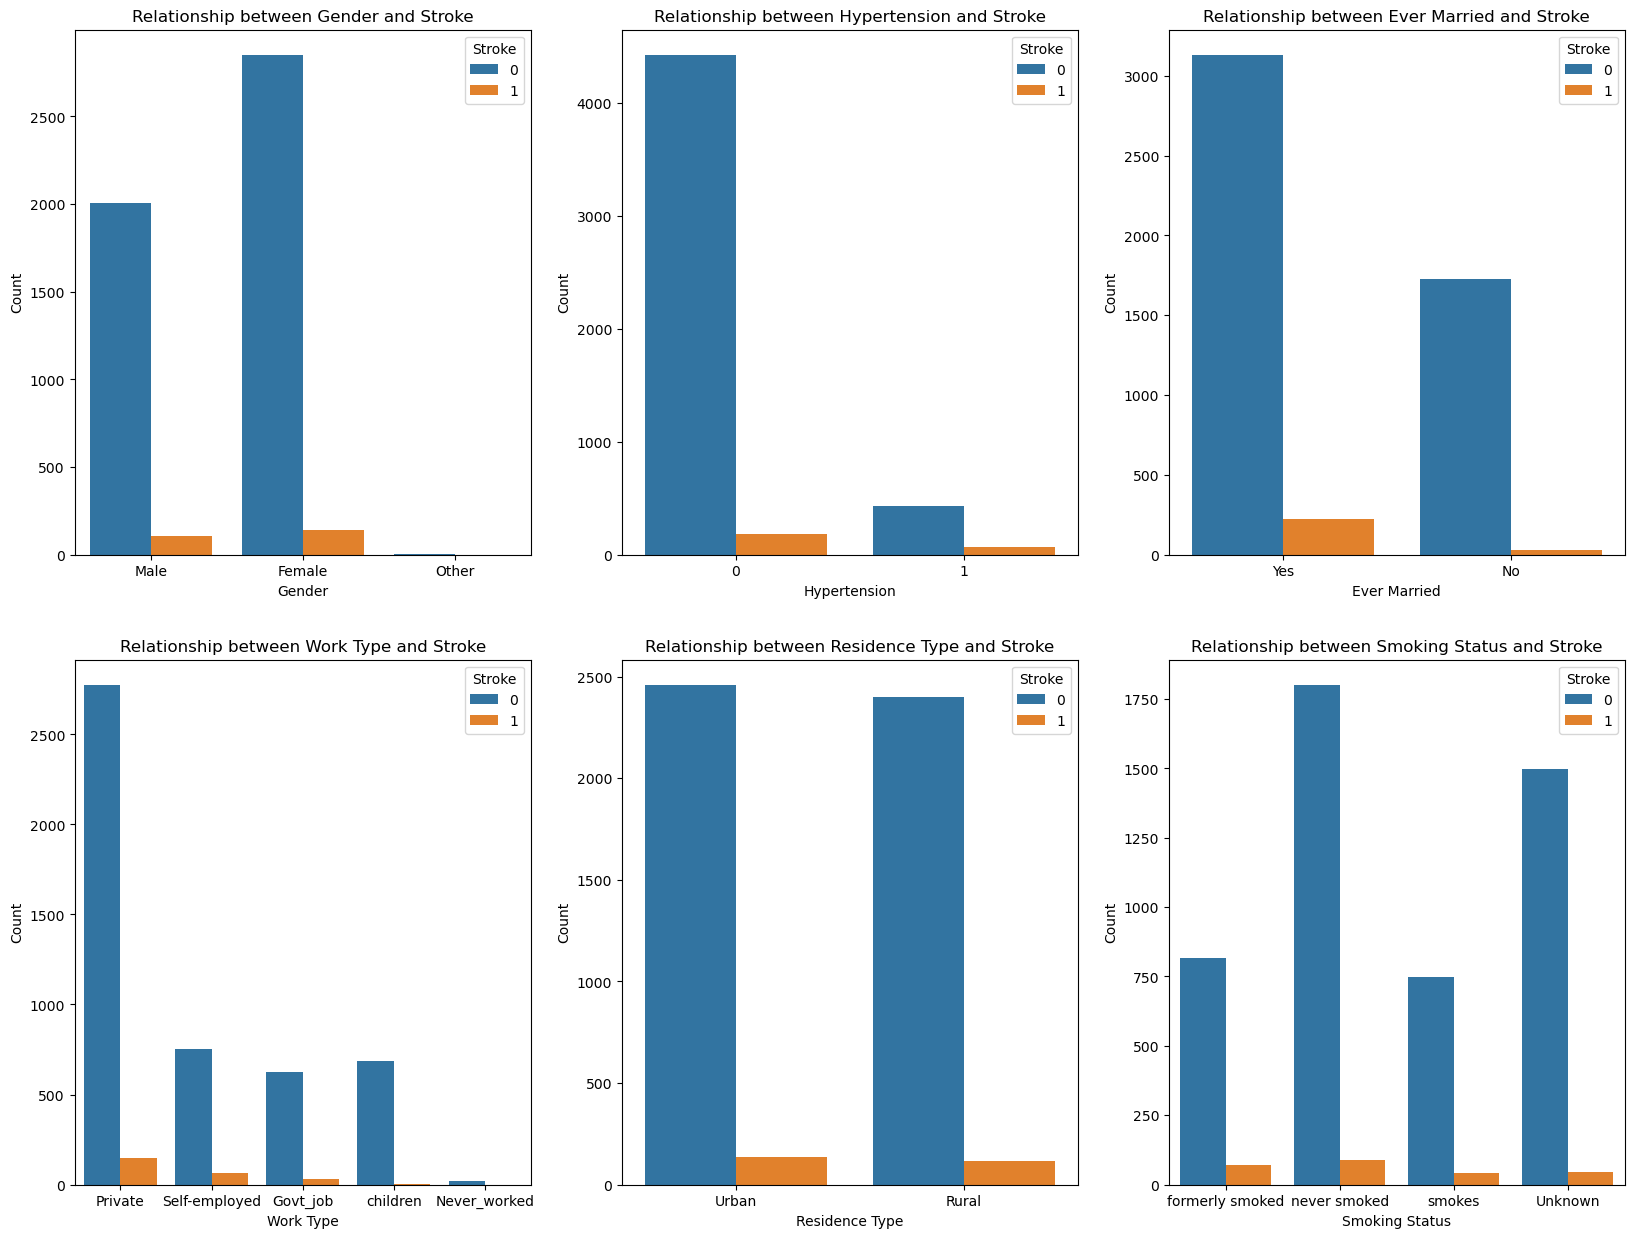

In [84]:
# Create the bar chart for categorical features
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.countplot(data=stroke_df_cleaned, x="gender", hue="stroke")
plt.title("Relationship between Gender and Stroke")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.subplot(2, 3, 2)
sns.countplot(data=stroke_df_cleaned, x="hypertension", hue="stroke")
plt.title("Relationship between Hypertension and Stroke")
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.subplot(2, 3, 3)
sns.countplot(data=stroke_df_cleaned, x="ever_married", hue="stroke")
plt.title("Relationship between Ever Married and Stroke")
plt.xlabel("Ever Married")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.subplot(2, 3, 4)
sns.countplot(data=stroke_df_cleaned, x="work_type", hue="stroke")
plt.title("Relationship between Work Type and Stroke")
plt.xlabel("Work Type")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.subplot(2, 3, 5)
sns.countplot(data=stroke_df_cleaned, x="Residence_type", hue="stroke")
plt.title("Relationship between Residence Type and Stroke")
plt.xlabel("Residence Type")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.subplot(2, 3, 6)
sns.countplot(data=stroke_df_cleaned, x="smoking_status", hue="stroke")
plt.title("Relationship between Smoking Status and Stroke")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.show()

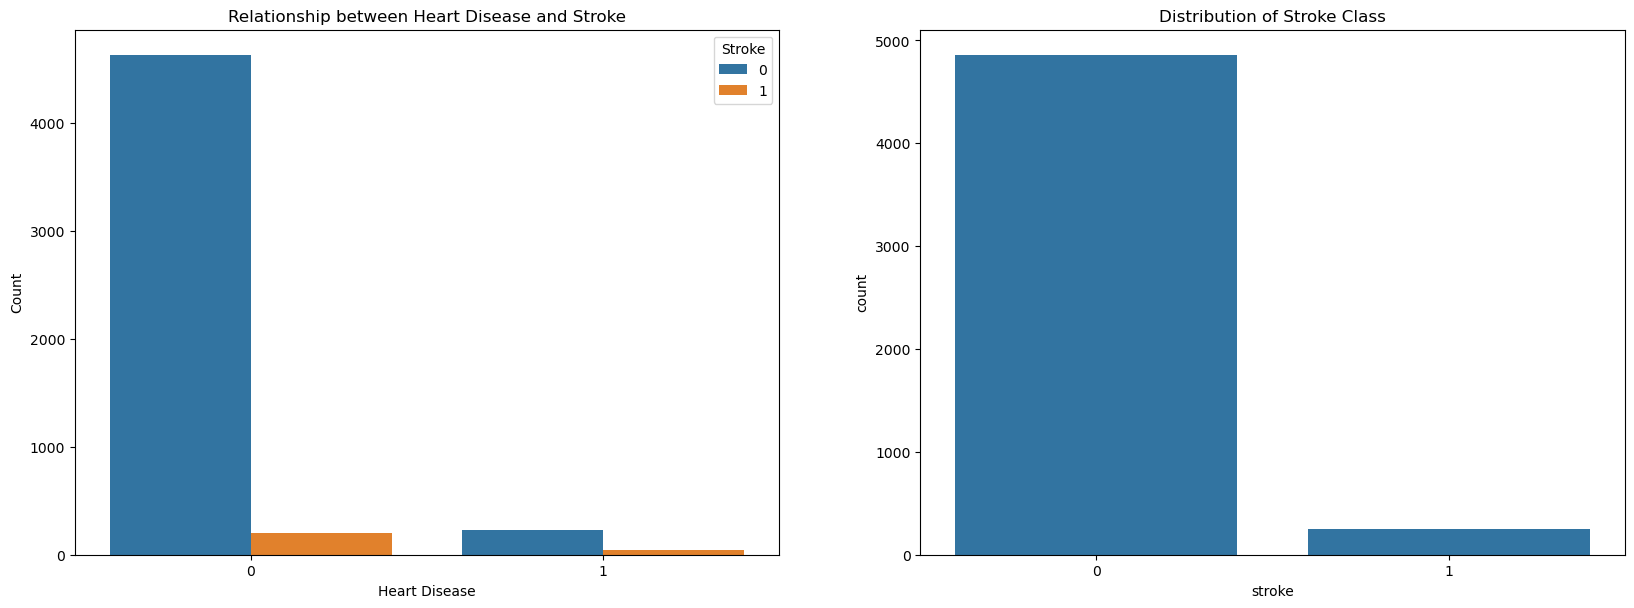

In [85]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.countplot(data=stroke_df_cleaned, x="heart_disease", hue="stroke")
plt.title("Relationship between Heart Disease and Stroke")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.legend(title="Stroke")

plt.subplot(2, 2, 2)
sns.countplot(data=stroke_df_cleaned, x="stroke")
plt.title("Distribution of Stroke Class")

plt.show()

<Axes: title={'center': 'Distribution of Stroke by Avg. Glucose Level'}, xlabel='avg_glucose_level', ylabel='Count'>

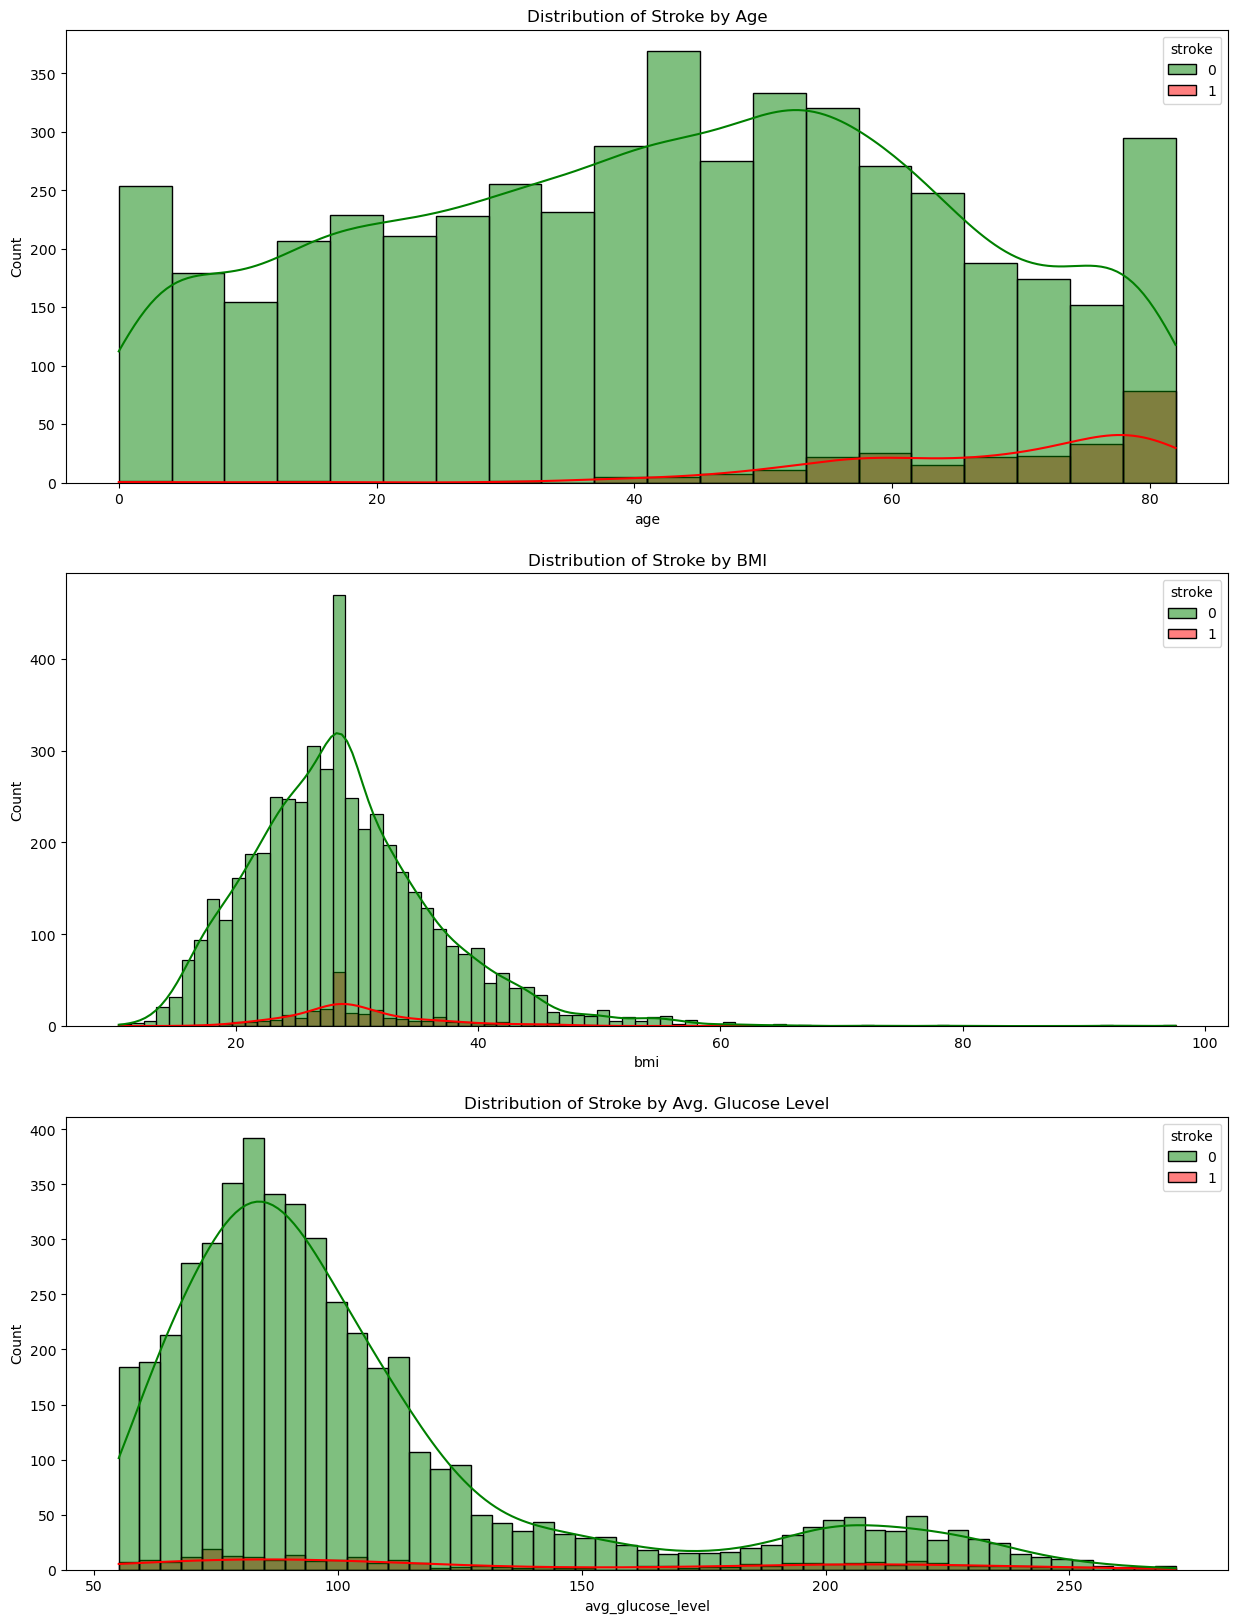

In [86]:
plt.figure(figsize=(15, 20))

plt.subplot(3, 1, 1)
plt.title("Distribution of Stroke by Age")
sns.histplot(data=stroke_df_cleaned, x='age', hue="stroke", kde=True, palette={0: "green", 1: "red"})
plt.subplot(3, 1, 2)
plt.title("Distribution of Stroke by BMI")
sns.histplot(data=stroke_df_cleaned, x='bmi', hue="stroke", kde=True, palette={0: "green", 1: "red"})
plt.subplot(3, 1, 3)
plt.title("Distribution of Stroke by Avg. Glucose Level")
sns.histplot(data=stroke_df_cleaned, x='avg_glucose_level', hue="stroke", kde=True, palette={0: "green", 1: "red"})

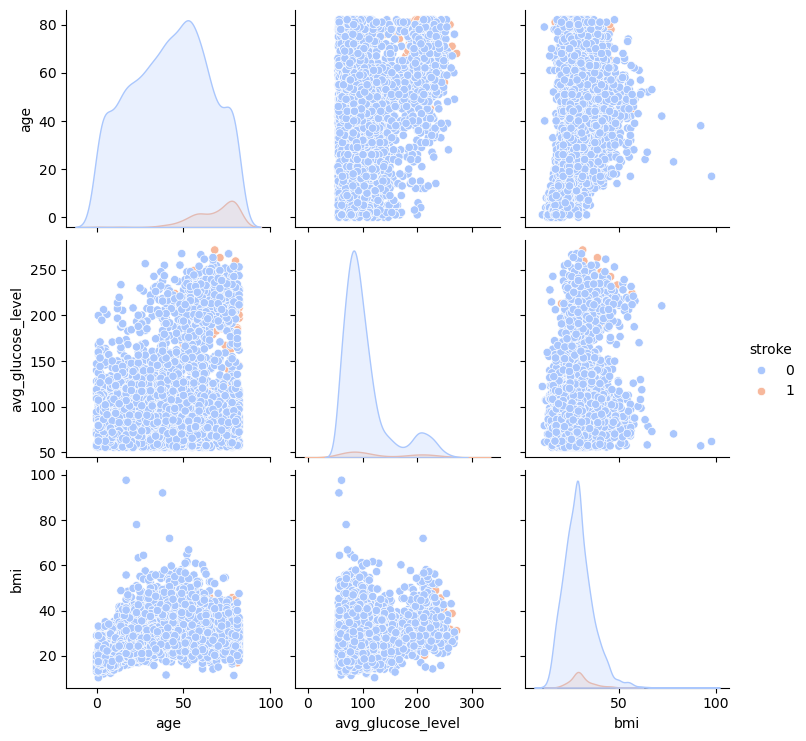

In [87]:
sns.pairplot(stroke_df_cleaned, vars=['age', 'avg_glucose_level', 'bmi'], hue='stroke', palette='coolwarm')

##### Check Outliers

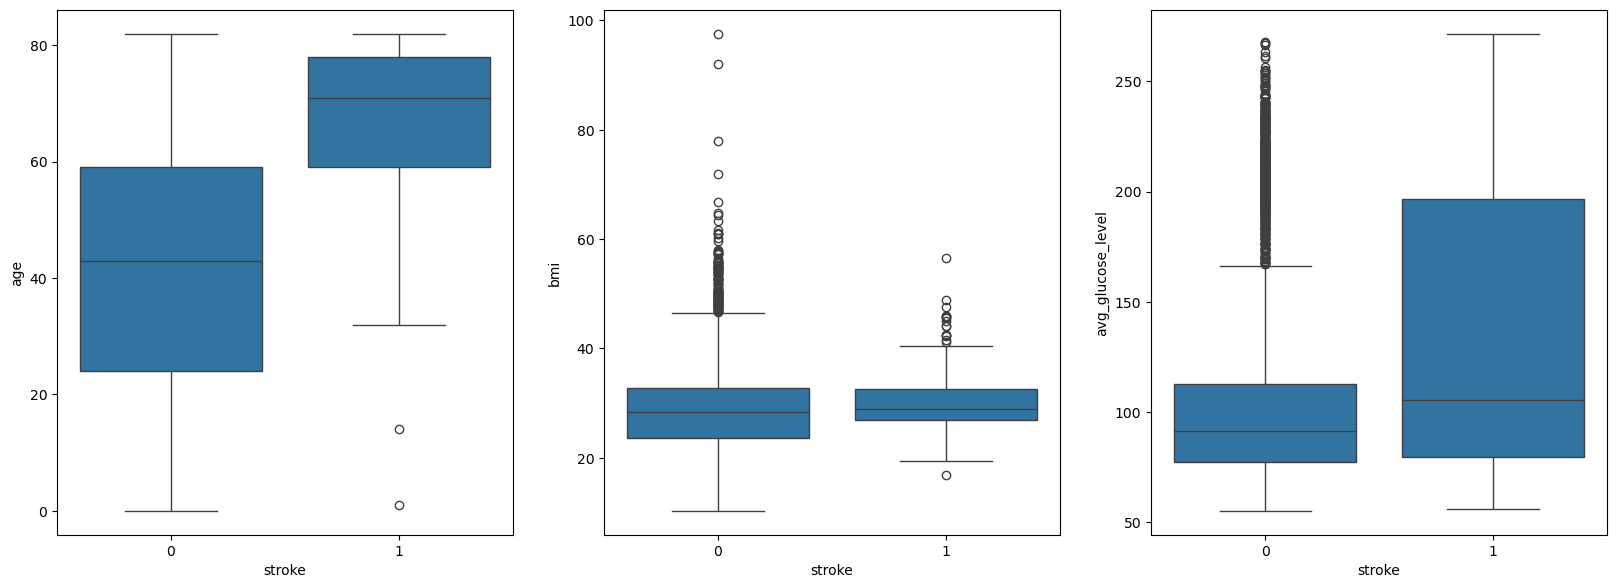

In [88]:
def plot_boxplot(dataframe):
    plt.figure(figsize=(20, 15))
    plt.subplot(2, 3, 1)
    sns.boxplot(x="stroke", y="age", data=dataframe)
    plt.subplot(2, 3, 2)
    sns.boxplot(x="stroke", y="bmi", data=dataframe)
    plt.subplot(2, 3, 3)
    sns.boxplot(x="stroke", y="avg_glucose_level", data=dataframe)

plot_boxplot(stroke_df_cleaned)

In [89]:
# Optionally remove outlier but I think the outlier can have some application like high bmi can indicate obesity

# remove outliers by interquartile range (IQR)
def remove_outliers_with_iqr(df):
    numeric_df = df.select_dtypes(include=['number'])
    
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Create a mask for non-outliers
    mask = ~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)
    
    # Return the dataframe without outliers
    return df[mask]

df_after_IQR = remove_outliers_with_iqr(stroke_df_cleaned)

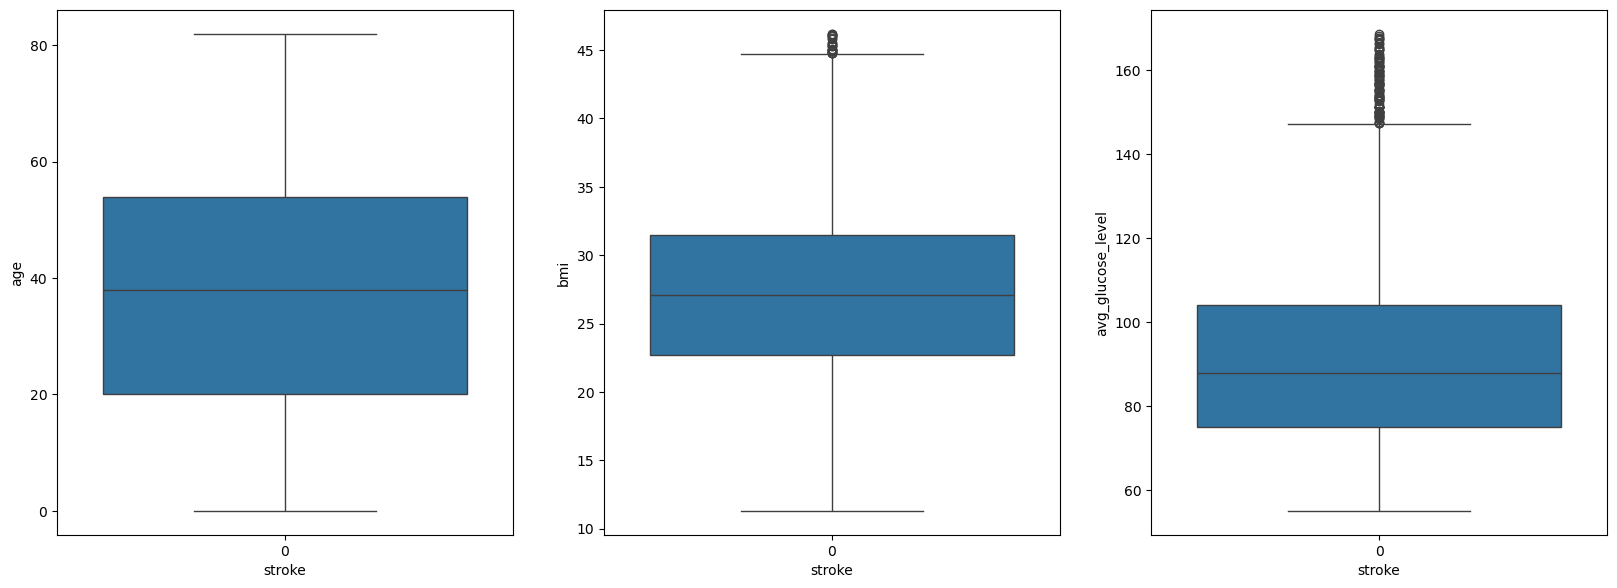

In [90]:
plot_boxplot(df_after_IQR)

##### Analysis

From Exploratory Data Analysis (EDA) and the features in the dataset, the following features seem relevant for predicting stroke:

- Age - Strongly correlated with stroke.
- Hypertension - A known risk factor.
- Heart Disease - Another key factor related to strokes.
- BMI - May be relevant, though its correlation is weaker; it could contribute when combined with other features.
- Average Glucose Level - Strongly linked to diabetes and stroke risk.
- Gender - Biological sex differences in stroke risk may exist.
- Smoking Status - Smoking is a common risk factor for cardiovascular diseases.

In [91]:
relevant_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level', 'gender', 'smoking_status', 'stroke']
stroke_df_features = stroke_df_cleaned[relevant_features]

stroke_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   int64  
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   bmi                5110 non-null   float64
 4   avg_glucose_level  5110 non-null   float64
 5   gender             5110 non-null   object 
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 319.5+ KB


In [ ]:
stroke_df_features = stroke_df_features.rename(columns={"gender": "sex", 'avg_glucose_level': 'blood_glucose'})
stroke_df_features['sex'] = stroke_df_features['sex'].map({'Male': 0, 'Female': 1}) 
stroke_df_features = stroke_df_features.dropna(subset=['sex'])

stroke_df_features.to_csv('../../cleaned_datasets/normalized_stroke_dataset.csv', index=False)